### Cointegration and pair trading

In [1]:
# importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import scipy.optimize as spop
import matplotlib.pyplot as plt

In [2]:
# specifying parameters
stocks = ['JPM', 'C']
start = '2022-12-31'
end = '2024-05-24'
fee = 0.001
window = 252
t_threshold = -2.5
# retrieving data
data = pd.DataFrame()
returns = pd.DataFrame()
for stock in stocks:
    prices = yf.download(stock, start, end)
    data[stock] = prices['Close']
    returns[stock] = np.append(data[stock][1:].reset_index(drop=True)/data[stock][:-1].reset_index(drop=True) - 1, 0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,JPM,C
Date,,
2023-01-03,135.119995,45.779999
2023-01-04,136.380005,46.959999
2023-01-05,135.350006,46.750000
2023-01-06,137.940002,47.310001
2023-01-09,137.369995,47.540001
...,...,...
2024-05-17,204.789993,64.070000
2024-05-20,195.580002,63.160000
2024-05-21,199.520004,64.739998


In [4]:
returns

,JPM,C
0,0.009325,0.025775
1,-0.007552,-0.004472
2,0.019136,0.011979
3,-0.004132,0.004862
4,0.008954,0.013673
...,...,...
345,-0.044973,-0.014203
346,0.020145,0.025016
347,-0.006065,-0.014211
348,-0.007009,-0.012535


In [5]:
# initializing arrays
gross_returns = np.array([])
net_returns = np.array([])
t_s = np.array([])
stock1 = stocks[0]
stock2 = stocks[1]

/tmp/ipykernel_20562/1401205061.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res1 = spop.minimize(unit_root, data[stock2][t]/data[stock1][t], method='Nelder-Mead')
/tmp/ipykernel_20562/1401205061.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt = float(res1.x)
/tmp/ipykernel_20562/1401205061.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fair_value = a_opt + b_opt*data[stock1][t]


day2024-01-04 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-05 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-08 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-09 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-10 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-11 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-12 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-16 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day2024-01-17 00:00:00

no trading
gross daily return: 0%
net da

/tmp/ipykernel_20562/1401205061.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signal = np.sign(fair_value - data[stock2][t])


day2024-04-17 00:00:00

long position on JPM and short position on C
gross daily return: 0.39%
net daily return: 0.39%
cumulative net return so far: 3.27%

day2024-04-18 00:00:00

long position on JPM and short position on C
gross daily return: 1.1%
net daily return: 1.1%
cumulative net return so far: 4.41%

day2024-04-19 00:00:00

long position on JPM and short position on C
gross daily return: -1.12%
net daily return: -1.12%
cumulative net return so far: 3.24%

day2024-04-22 00:00:00

long position on JPM and short position on C
gross daily return: -1.38%
net daily return: -1.38%
cumulative net return so far: 1.82%

day2024-04-23 00:00:00

no trading
gross daily return: 0%
net daily return: -0.1%
cumulative net return so far: 1.71%

day2024-04-24 00:00:00

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 1.71%

day2024-04-25 00:00:00

long position on C and short position on JPM
gross daily return: 1.35%
net daily return: 1.25%
cumulative net ret

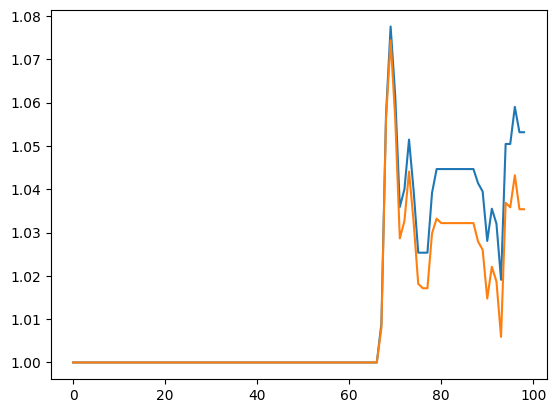

In [6]:
# moving through the samples
for t in range(window, len(data)):
    # defining the unit root function: stock2 = a + b*stock1
    def unit_root(b):
        a = np.average(data[stock2][t-window:t] - b*data[stock1][t-window:t])
        fair_value = a + b*data[stock1][t-window:t]
        diff = np.array(fair_value - data[stock2][t-window:t])
        diff_diff = diff[1:] - diff[:-1]
        reg = sm.OLS(diff_diff, diff[:-1])
        res = reg.fit()
        return res.params[0]/res.bse[0]

    res1 = spop.minimize(unit_root, data[stock2][t]/data[stock1][t], method='Nelder-Mead')
    t_opt = res1.fun
    b_opt = float(res1.x)
    a_opt = np.average(data[stock2][t-window:t] - b_opt*data[stock1][t-window:t])
    fair_value = a_opt + b_opt*data[stock1][t]
    
    #optimizing the cointegration equation parameters
    if t == window:
        old_signal = 0
    if t_opt > t_threshold:
        signal = 0
        gross_return = 0
    else:
        signal = np.sign(fair_value - data[stock2][t])
        gross_return = signal*returns[stock2][t] - signal*returns[stock1][t]

    fees = fee * abs(signal - old_signal)
    net_return = gross_return - fees
    gross_returns = np.append(gross_returns, gross_return)
    net_returns = np.append(net_returns, net_return)
    t_s = np.array(t_s, t_opt)
    
    # simulating trading
    print('day' + str(data.index[t]))
    print('')
    if signal == 0:
        print('no trading')
    elif signal == 1:
        print("long position on " + stock2 + " and short position on "+stock1)
    else:
        print("long position on " + stock1 + " and short position on "+stock2)
    print('gross daily return: '+str(round(gross_return*100,2))+'%')
    print('net daily return: '+str(round(net_return*100,2))+'%')
    print('cumulative net return so far: '+str(round(np.prod(1+net_returns)*100-100,2))+'%')
    print('')
    old_signal = signal
    # interface: reporting daily positions and realized returns
plt.plot(np.append(1,np.cumprod(1+gross_returns)))
plt.plot(np.append(1,np.cumprod(1+net_returns)))
# plotting equity returns